In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Step 1. Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [11]:
 # Step 2. Preprocessing – scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Step 3. Feature Selection (based on correlation)
corr = pd.DataFrame(X, columns=housing.feature_names).corrwith(pd.Series(y))
top_features = corr.abs().sort_values(ascending=False).head(5).index
X_selected = X[top_features]

print("Top 5 correlated features with target:\n", top_features.tolist())


Top 5 correlated features with target:
 ['MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms']


In [15]:
# Step 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [19]:
# Step 5. Train Ensemble Models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [20]:
# Step 6. Predictions
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [25]:
# Step 7. Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("\nRandom Forest:")
print("MSE:", round(mse_rf, 3), "| R²:", round(r2_rf, 3))

print("\nGradient Boosting:")
print("MSE:", round(mse_gb, 3), "| R²:", round(r2_gb, 3))


Random Forest:
MSE: 0.453 | R²: 0.654

Gradient Boosting:
MSE: 0.48 | R²: 0.634


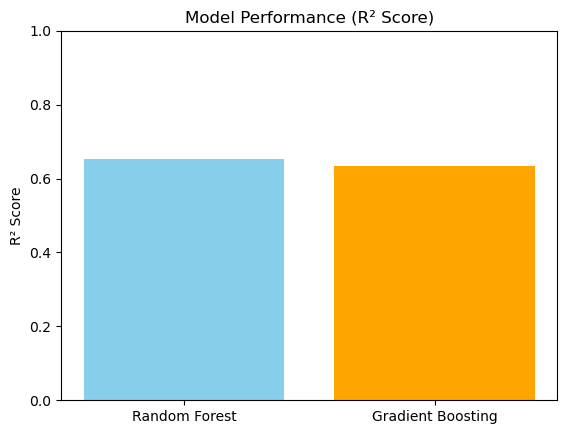

In [29]:
# Step 8. Simple Performance Graph
models = ['Random Forest', 'Gradient Boosting']
r2_scores = [r2_rf, r2_gb]

plt.bar(models, r2_scores, color=['skyblue', 'orange'])
plt.title("Model Performance (R² Score)")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()

